In [8]:
%load_ext autoreload
%autoreload 2
from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import logging
logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO, force=True
)

In [10]:
from flair.embeddings import TransformerWordEmbeddings

model_name = "bert-base-uncased"

params = {
    'model': model_name,
    'use_context': False,
    'layers':'-1',
    'layer_mean':True,
    'subtoken_pooling':'mean'
}

embedding = TransformerWordEmbeddings(**params)

In [11]:
import utils, evaluators
ev = evaluators.FlairEvaluator(embedding, model_name)
ev.load_dataset("../datasets/dataset_1.json")

In [12]:
ev.reset_evaluator()
evaluation = ev.evaluate()

'OOV:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV


'Lost:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV
1477,4,when,"(now, 0)",1,NaN,True,False
1478,4,when,"(now, 1)",1,NaN,True,False


'Statistics:'

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
bert-base-uncased-cos,0.244901,0.236686,0.470588,0.314961,0.887524,0.238309


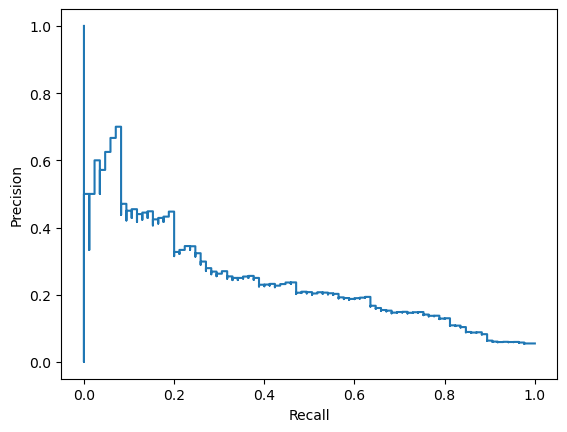

In [13]:
st = utils.Statistics(ev)

display("OOV:")
display(st.get_oov())

display("Lost:")
display(st.get_lost())

stats = st.calculate_statistics()
display("Statistics:")
display(stats)

st.display_PRC()

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
bert-base-uncased-cos,0.244901,0.236686,0.470588,0.314961,0.887524,0.238309
bert-base-uncased-dot,46.101681,0.241860,0.611765,0.346667,0.873303,0.253998
bert-base-uncased-euc,5.570326,0.105033,0.564706,0.177122,0.711700,0.116934


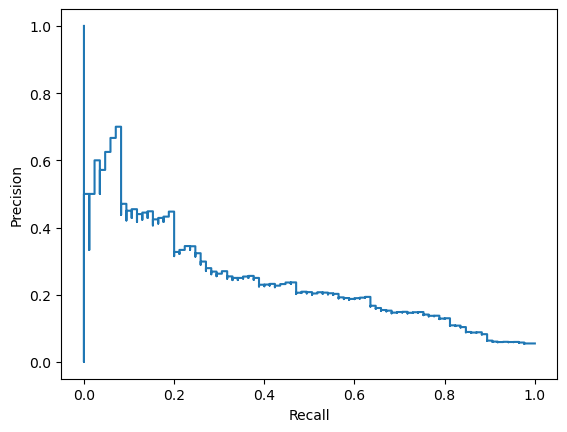

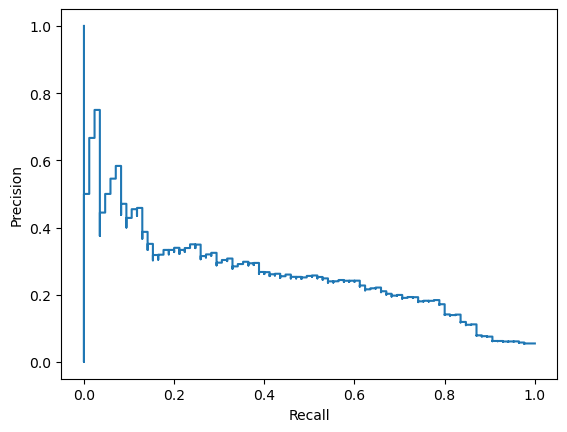

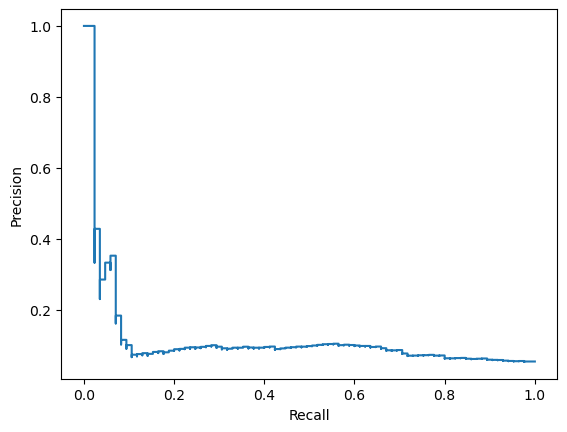

In [14]:
import pandas as pd
methods = [member for member in utils.SimilarityFunction]

results = pd.DataFrame()

for method in methods:
    ev.similarity_method = method
    ev.reset_evaluator()
    data = ev.evaluate()
    st = utils.Statistics(ev)
    stats = st.calculate_statistics()
    st.display_PRC()
    results = pd.concat([results, stats])

display(results)